### Analysis of Latitude versus Weather Conditions.
* According to our analysis of over 500 cities selected at random when this analysis was done, humidity is not significantly higher or lower near the equator.
* Proximity to the equator also does not seem to affect cloudiness percentage when this analysis was done as shown by the relatively symmetric distribution of cloudiness around the equator. 
* Maximum temperatures and winds speeds found at the time of this analysis were also found to be roughly symmetric around the equator. 


In [103]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

In [104]:
# Import file with personal API key variable
import ty_api 

# Incorporate citipy to determine nearest city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [105]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[50])

612
sur


## Perform API Calls

In [106]:
# OpenWeatherMap API Key
api_key = ty_api.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key + "&q="
response = requests.get(url + cities[0]).json()

print(response)

{'coord': {'lon': 30.79, 'lat': 59.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.8, 'pressure': 1013, 'humidity': 94, 'temp_min': 69.8, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 4.47, 'deg': 120}, 'clouds': {'all': 0}, 'dt': 1532374200, 'sys': {'type': 1, 'id': 7267, 'message': 0.0041, 'country': 'RU', 'sunrise': 1532308846, 'sunset': 1532371463}, 'id': 546105, 'name': 'Nikolskoye', 'cod': 200}


In [107]:
#Request weather data for each city in cities
city_data =[]

for city in cities:
    print("Processing Record %s" % (city))
    try:
        response = requests.get(url + city).json()
        #print(json.dumps(response, indent = 4))
        country_code = response["sys"]["country"]
        clouds = response["clouds"]["all"]
        city = response["name"]
        date = response["dt"]
        humidity = response["main"]["humidity"]
        lat = response["coord"]["lat"]
        lon = response["coord"]["lon"]
        max_temp = response["main"]["temp_max"]
        winds = response["wind"]["speed"]

        city_data.append({"City": city, "Country":country_code,
                         "Clouds": clouds, "Date": date, 
                         "Humidity": humidity, "Lat": lat,
                         "Lon": lon, "Max Temp": max_temp, "Winds": winds})
    except KeyError:
        #print("City not found")
        pass
#print(city_data)

Processing Record nikolskoye
Processing Record sitka
Processing Record mataura
Processing Record praia da vitoria
Processing Record quang ngai
Processing Record mvuma
Processing Record dikson
Processing Record comodoro rivadavia
Processing Record bluff
Processing Record cape town
Processing Record cabo san lucas
Processing Record barrow
Processing Record jumla
Processing Record clyde river
Processing Record kapaa
Processing Record rikitea
Processing Record georgetown
Processing Record punta arenas
Processing Record ushuaia
Processing Record goba
Processing Record lebu
Processing Record kavieng
Processing Record tasiilaq
Processing Record teahupoo
Processing Record vila velha
Processing Record grand centre
Processing Record butaritari
Processing Record hobart
Processing Record khatanga
Processing Record hermanus
Processing Record college
Processing Record komsomolskiy
Processing Record vaini
Processing Record hihifo
Processing Record khandbari
Processing Record hofn
Processing Record ja

Processing Record westport
Processing Record suluq
Processing Record samana
Processing Record zhezkazgan
Processing Record bridlington
Processing Record barcelos
Processing Record romitan
Processing Record isla vista
Processing Record krivosheino
Processing Record murray bridge
Processing Record olafsvik
Processing Record gasa
Processing Record petauke
Processing Record ranot
Processing Record torbay
Processing Record zhanakorgan
Processing Record thompson
Processing Record kabinda
Processing Record hamilton
Processing Record banda aceh
Processing Record jizan
Processing Record mount gambier
Processing Record florianopolis
Processing Record gat
Processing Record helena
Processing Record milkovo
Processing Record bundaberg
Processing Record tombouctou
Processing Record laramie
Processing Record yacuiba
Processing Record qaanaaq
Processing Record sauda
Processing Record killybegs
Processing Record celestun
Processing Record necochea
Processing Record rudbar
Processing Record jaisalmer
Pr

Processing Record waw
Processing Record marsh harbour
Processing Record venado tuerto
Processing Record sterling
Processing Record tezu
Processing Record baturaja
Processing Record flinders
Processing Record mendoza
Processing Record akureyri
Processing Record balykshi
Processing Record atasu
Processing Record benito juarez
Processing Record raga
Processing Record tiarei


In [110]:
#Convert city data list of a dictionary to a data frame. 
city_df = pd.DataFrame(city_data)

print(len(city_df))
city_df.head()


542


,City,Clouds,Country,Date,Humidity,Lat,Lon,Max Temp,Winds
0,Nikolskoye,0,RU,1532374200,94,59.70,30.79,69.80,4.47
1,Sitka,8,US,1532377002,49,37.17,-99.65,93.70,7.49
2,Mataura,48,NZ,1532376996,100,-46.19,168.86,35.02,4.47
3,Praia da Vitoria,75,PT,1532376000,94,38.73,-27.07,71.60,15.66
4,Quang Ngai,76,VN,1532377003,75,15.12,108.80,78.76,3.13


In [111]:
#convert current Unix Timestamp date format to date time format
import datetime 
city_df["Date"] = pd.to_datetime(city_df["Date"],unit="s")
#format = "%d/%m/%Y"
#Take out the hours minutes and seconds from the date time format. 
city_df["Date"] = city_df["Date"].dt.date

print(city_df.head())

#Transfer city_df to a csv file. 

city_df.to_csv("Output/RandomCityWeatherDataOutput.csv")

               City  Clouds Country        Date  Humidity    Lat     Lon  \
0        Nikolskoye       0      RU  2018-07-23        94  59.70   30.79   
1             Sitka       8      US  2018-07-23        49  37.17  -99.65   
2           Mataura      48      NZ  2018-07-23       100 -46.19  168.86   
3  Praia da Vitoria      75      PT  2018-07-23        94  38.73  -27.07   
4        Quang Ngai      76      VN  2018-07-23        75  15.12  108.80   

   Max Temp  Winds  
0     69.80   4.47  
1     93.70   7.49  
2     35.02   4.47  
3     71.60  15.66  
4     78.76   3.13  


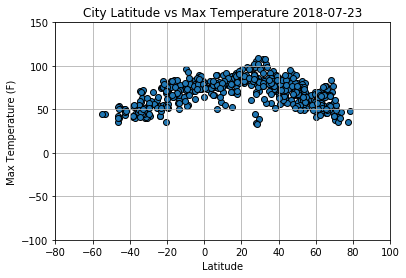

In [112]:
#Plot out latitude versus maximum temperature(F). See openweather api documentation for units used.  
latitude = city_df["Lat"]
maxtemp = city_df["Max Temp"]
date = city_df["Date"]
plt.scatter(x= latitude, y= maxtemp, marker ="o", edgecolors="black")
plt.ylim(-100,150)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
#Include the date in the plot title. 
plt.title(f"City Latitude vs Max Temperature {date[0]}")
plt.grid(True)
plt.savefig("Output/LatVsMTemp.png")

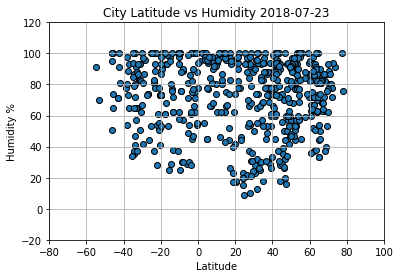

<Figure size 432x288 with 0 Axes>

In [113]:
#Plot latitude versus humidity plot. 
latitude = city_df["Lat"]
humidity = city_df["Humidity"]
date = city_df["Date"]
plt.scatter(x= latitude, y= humidity, marker ="o", edgecolors="black")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.title(f"City Latitude vs Humidity {date[0]}")
plt.grid(True)
#plt.figure(figsize=(20,10))
plt.show()
plt.savefig("Output/LatVsHumid.png")

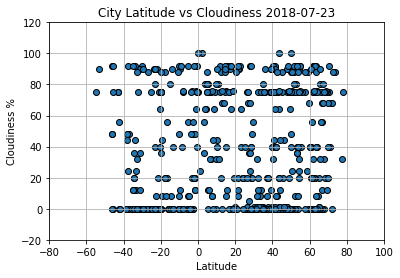

In [114]:
#Plot the latitude versus cloudiness percentage. 
latitude = city_df["Lat"]
clouds = city_df["Clouds"]
date = city_df["Date"]
plt.scatter(x= latitude, y= clouds, marker ="o", edgecolors="black")
plt.ylim(-20,120)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title(f"City Latitude vs Cloudiness {date[0]}")
plt.grid(True)
plt.savefig("Output/LatVsClouds.png")

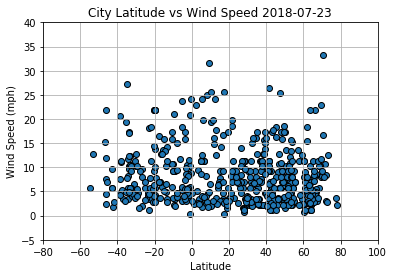

In [115]:
#Plot latitude versus wind speed. 
latitude = city_df["Lat"]
winds = city_df["Winds"]
date = city_df["Date"]
plt.scatter(x= latitude, y= winds, marker ="o", edgecolors="black")
plt.ylim(-5,40)
plt.xlim(-80,100)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs Wind Speed {date[0]}")
plt.grid(True)
plt.savefig("Output/LatVsWinds.png")